In [1]:
import pandas as pd
from mlxtend import frequent_patterns as fp
from IPython.display import display, Markdown


df = pd.read_csv("lastfm.csv")
df.shape

(289955, 4)

In [2]:
df.head()

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany


<h1>1. Выбрать несколько стран для набора данных lastfm для сравнительного анализа.</h1>

In [3]:
chosen_data = df[(df.country=="Germany") | (df.country=="France") | (df.country=="Spain")]
chosen_data.shape

(39535, 4)

In [4]:
chosen_data[df.country=="Germany"][0:5]

C:\Users\79270\AppData\Local\Temp\ipykernel_14952\32232849.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chosen_data[df.country=="Germany"][0:5]


,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany


In [5]:
chosen_data[df.country=="France"][0:5]

C:\Users\79270\AppData\Local\Temp\ipykernel_14952\2728665268.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chosen_data[df.country=="France"][0:5]


,user,artist,sex,country
1208,81,therion,f,France
1209,81,muse,f,France
1210,81,nightwish,f,France
1211,81,dream theater,f,France
1212,81,loreena mckennitt,f,France


In [6]:
chosen_data[df.country=="Spain"][0:5]

C:\Users\79270\AppData\Local\Temp\ipykernel_14952\547061786.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chosen_data[df.country=="Spain"][0:5]


,user,artist,sex,country
1086,74,in extremo,m,Spain
1087,74,nine inch nails,m,Spain
1088,74,billy talent,m,Spain
1089,74,panic! at the disco,m,Spain
1090,74,the ataris,m,Spain


<h1>2. Подготовить набор для поиска ассоциативных правил.</h1>

In [7]:
grouped_data = chosen_data.groupby(by='user')['artist'].apply(','.join)
grouped_data

user
1        red hot chili peppers,the black dahlia murder,...
33       death cab for cutie,tegan and sara,kimya dawso...
42       soundtrack,groove coverage,avril lavigne,the r...
51       kate nash,arctic monkeys,lykke li,adele,tegan ...
62       beatsteaks,clueso,the kooks,die Ärzte,plain wh...
                               ...                        
19646    mike oldfield,dire straits,muse,radiohead,john...
19662    blind guardian,in extremo,subway to sally,finn...
19672    system of a down,björk,portishead,the prodigy,...
19695    the kills,bright eyes,adam green,cocorosie,dev...
19707    bat for lashes,mogwai,arcade fire,cat power,th...
Name: artist, Length: 2090, dtype: object

In [8]:
binarised_data = grouped_data.str.get_dummies(',')
binarised_data

,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,[unknown],...,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7,Édith piaf
user,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19646,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19662,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
19672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
binarised_data.sum().sort_values(ascending=False)

coldplay                 351
radiohead                292
muse                     273
linkin park              271
red hot chili peppers    264
                        ... 
myslovitz                  2
kult                       2
o.s.t.r.                   1
coma                       1
happysad                   1
Length: 1002, dtype: int64

<h1>3. Найти характерные комбинации музыкальных коллективов. Сопоставить характерные
комбинации для выборок по странам.</h1>

In [10]:
def find_combinations(df, algorithm, min_combination_length, disp_number = False, min_support = 0.02):
    result = None

    binarised_data = df.groupby(by='user')['artist'].apply(','.join).str.get_dummies(',')
    combinations = algorithm(binarised_data, min_support = min_support, use_colnames = True)
    combinations['length'] = combinations.itemsets.apply(lambda x: len(x))
    if min_combination_length>1:
        result = combinations[combinations.length >= min_combination_length]
    else:
        result = combinations

    result = result.drop(columns=['length']).sort_values(by='support', ascending=False)
    
    if disp_number:
        display(Markdown(f"<h4>Найдено {len(result)} комбинаций</h4>"))
    return result

whole_combinations = find_combinations(chosen_data, fp.apriori, 2, disp_number=True)
whole_combinations

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<h4>Найдено 214 комбинаций</h4>

,support,itemsets
350,0.049282,"(coldplay, radiohead)"
346,0.047368,"(coldplay, muse)"
445,0.045933,"(radiohead, muse)"
355,0.043541,"(the killers, coldplay)"
484,0.042105,"(rammstein, system of a down)"
...,...,...
286,0.020096,"(rammstein, ac/dc)"
406,0.020096,"(iron maiden, rammstein)"
420,0.020096,"(linkin park, papa roach)"
423,0.020096,"(rise against, linkin park)"


<h3>Характерные комбинации для Германии</h3>

In [11]:
germany_combinations = find_combinations(chosen_data[chosen_data.country=='Germany'], fp.apriori, 1, disp_number=True)
germany_combinations

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<h4>Найдено 598 комбинаций</h4>

,support,itemsets
82,0.194909,(die Ärzte)
171,0.157518,(linkin park)
66,0.156722,(coldplay)
226,0.147176,(red hot chili peppers)
223,0.146380,(rammstein)
...,...,...
311,0.020684,"(rammstein, apocalyptica)"
563,0.020684,"(the beatles, nirvana)"
187,0.020684,(misfits)
446,0.020684,"(die Ärzte, papa roach)"


<h3>Характерные комбинации для Франции</h3>

In [12]:
find_combinations(chosen_data[chosen_data.country=='France'], fp.apriori, 2, disp_number=True)

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<h4>Найдено 550 комбинаций</h4>

,support,itemsets
597,0.103976,"(radiohead, muse)"
653,0.088685,"(pink floyd, radiohead)"
690,0.079511,"(the beatles, radiohead)"
418,0.079511,"(coldplay, radiohead)"
317,0.076453,"(air, radiohead)"
...,...,...
532,0.021407,"(system of a down, koЯn)"
530,0.021407,"(koЯn, linkin park)"
528,0.021407,"(kaiser chiefs, radiohead)"
527,0.021407,"(kaiser chiefs, muse)"


<h3>Характерные комбинации для Испании</h3>

In [13]:
find_combinations(chosen_data[chosen_data.country=='Spain'], fp.apriori, 2, disp_number=True)

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<h4>Найдено 647 комбинаций</h4>

,support,itemsets
380,0.088933,"(the killers, coldplay)"
364,0.079051,"(coldplay, muse)"
372,0.077075,"(coldplay, radiohead)"
547,0.075099,"(the killers, muse)"
447,0.069170,"(the killers, franz ferdinand)"
...,...,...
417,0.021739,"(editors, the kooks)"
722,0.021739,"(coldplay, foo fighters, franz ferdinand)"
724,0.021739,"(coldplay, oasis, foo fighters)"
411,0.021739,"(the rolling stones, dire straits)"


<h1>4. Сравнить результаты поиска характерных комбинаций разных алгоритмов (apriori,
fpgrowth, fpmax)</h1>

<h3>Apriori</h3>

In [14]:
full_combinations = find_combinations(chosen_data, fp.apriori, 1, disp_number=True)
full_combinations

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<h4>Найдено 499 комбинаций</h4>

,support,itemsets
61,0.167943,(coldplay)
213,0.139713,(radiohead)
182,0.130622,(muse)
159,0.129665,(linkin park)
218,0.126316,(red hot chili peppers)
...,...,...
290,0.020096,"(portishead, air)"
33,0.020096,(ben harper)
286,0.020096,"(rammstein, ac/dc)"
261,0.020096,(the pussycat dolls)


<h3>FPgrowth</h3>

In [15]:
find_combinations(chosen_data, fp.fpgrowth, 1, disp_number=True)

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<h4>Найдено 499 комбинаций</h4>

,support,itemsets
10,0.167943,(coldplay)
109,0.139713,(radiohead)
61,0.130622,(muse)
11,0.129665,(linkin park)
0,0.126316,(red hot chili peppers)
...,...,...
310,0.020096,"(arctic monkeys, foo fighters)"
481,0.020096,"(metallica, black sabbath)"
473,0.020096,"(iron maiden, rammstein)"
474,0.020096,"(radiohead, björk)"


<h3>FPmax</h3>

In [16]:
find_combinations(chosen_data, fp.fpmax, 1, disp_number=True)

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<h4>Найдено 419 комбинаций</h4>

,support,itemsets
274,0.063636,(queen)
262,0.061722,(the prodigy)
255,0.060766,([unknown])
251,0.058373,(nine inch nails)
244,0.056459,(johnny cash)
...,...,...
307,0.020096,"(rammstein, ac/dc)"
310,0.020096,"(system of a down, die toten hosen)"
324,0.020096,"(portishead, air)"
348,0.020096,"(arctic monkeys, foo fighters)"


<h1>5. Построить ассоциативные правила для одной из выборок (для выбранной страны). Вывести правила с наилучшими оценками качества ( Confidence, Lift и др.). Проанализировать взаимосвязь оценок.</h1>

<h3>В качестве выборки страны для построения ассоциативных правил было решено выбрать Германию, потому что она мне больше всех из этих трех стран нравится...</h3>

In [27]:
implications = fp.association_rules(germany_combinations, metric = "confidence", min_threshold = 0.3)
pd.set_option('display.max_rows', None)
display(implications.sort_values('support', ascending = False))
pd.set_option('display.max_rows', 60)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(die Ärzte),(die toten hosen),0.194909,0.115354,0.065235,0.334694,2.901450,0.042751,1.329683,0.814000
1,(die toten hosen),(die Ärzte),0.115354,0.194909,0.065235,0.565517,2.901450,0.042751,1.852988,0.740799
2,(system of a down),(die Ärzte),0.128878,0.194909,0.056484,0.438272,2.248602,0.031364,1.433240,0.637430
3,(rammstein),(die Ärzte),0.146380,0.194909,0.056484,0.385870,1.979747,0.027953,1.310945,0.579749
4,(red hot chili peppers),(die Ärzte),0.147176,0.194909,0.054893,0.372973,1.913580,0.026207,1.283982,0.559810
5,(rammstein),(system of a down),0.146380,0.128878,0.053302,0.364130,2.825382,0.034436,1.369969,0.756854
6,(system of a down),(rammstein),0.128878,0.146380,0.053302,0.413580,2.825382,0.034436,1.455646,0.741648
7,(linkin park),(die Ärzte),0.157518,0.194909,0.050915,0.323232,1.658380,0.020213,1.189613,0.471229
8,(farin urlaub),(die Ärzte),0.080350,0.194909,0.049324,0.613861,3.149485,0.033663,2.084981,0.742117
9,(red hot chili peppers),(coldplay),0.147176,0.156722,0.046142,0.313514,2.000439,0.023076,1.228397,0.586416


In [18]:
implications.sort_values('support', ascending = False).head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(die Ärzte),(die toten hosen),0.194909,0.115354,0.065235,0.334694,2.90145,0.042751,1.329683,0.814


In [19]:
implications.sort_values('lift', ascending = False).head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
233,(equilibrium),(ensiferum),0.038982,0.042959,0.020684,0.530612,12.351474,0.01901,2.038913,0.956317


In [20]:
implications.sort_values('leverage', ascending = False).head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(die Ärzte),(die toten hosen),0.194909,0.115354,0.065235,0.334694,2.90145,0.042751,1.329683,0.814


In [21]:
implications.sort_values('zhangs_metric', ascending = False).head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
232,(ensiferum),(equilibrium),0.042959,0.038982,0.020684,0.481481,12.351474,0.01901,1.853392,0.960292


<h1>6. Найти характерные комбинации и ассоциативные правила длиной не менее 5 признаков.
Сравнить оценки качества таких правил с короткими правилами.</h1>

In [22]:
weaker_implications = fp.association_rules(find_combinations(chosen_data, fp.apriori, 1, False, 0.01), metric = "confidence", min_threshold = 0.1)
filtered_implications = weaker_implications[weaker_implications.antecedents.apply(lambda x: len(x) >= 3)]
filtered_implications

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2571,"(bloc party, the killers, coldplay)",(muse),0.020096,0.130622,0.011483,0.571429,4.374673,0.008858,2.028549,0.787231
2572,"(bloc party, the killers, muse)",(coldplay),0.016746,0.167943,0.011483,0.685714,4.083028,0.008671,2.647455,0.767944
2573,"(bloc party, coldplay, muse)",(the killers),0.015789,0.109569,0.011483,0.727273,6.637555,0.009753,3.264912,0.862968
2574,"(the killers, coldplay, muse)",(bloc party),0.018182,0.081340,0.011483,0.631579,7.764706,0.010004,2.493506,0.887346
2701,"(bloc party, the killers, arctic monkeys)",(muse),0.016746,0.130622,0.011005,0.657143,5.030874,0.008817,2.535686,0.814874
2702,"(bloc party, the killers, muse)",(arctic monkeys),0.016746,0.092823,0.011005,0.657143,7.079529,0.009450,2.645933,0.873374
2703,"(bloc party, arctic monkeys, muse)",(the killers),0.016746,0.109569,0.011005,0.657143,5.997505,0.009170,2.597089,0.847456
2704,"(the killers, arctic monkeys, muse)",(bloc party),0.019617,0.081340,0.011005,0.560976,6.896700,0.009409,2.092504,0.872112
2715,"(bloc party, coldplay, arctic monkeys)",(muse),0.014833,0.130622,0.011005,0.741935,5.680019,0.009067,3.368840,0.836349
2716,"(bloc party, coldplay, muse)",(arctic monkeys),0.015789,0.092823,0.011005,0.696970,7.508591,0.009539,2.993684,0.880725


<h1>7. Привести примеры «тривиальных» и «нетривиальных» правил</h1>

<h3>Тривиальные правила:<h3>
<h4>die Ärzte -> die toten hosen(обе - немецкие металл группы)</h4>
<h4>red hot chili peppers -> coldplay (обе - американские инди группы)</h4>
<h3>Нетривиальные правила:</h3>
<h4>rihanna -> linkin park (хип-хоп исполнительница и рок группа)</h4>


<h1>8. Выполнить анализ зависимости оценок качества правил от поддержки и длины правил</h1>

In [23]:
display(Markdown(f"<h3>Вариант {(ord('Ф') + ord('Г')) % 5}</h3>"))

<h3>Вариант 3</h3>

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<Axes: xlabel='support'>

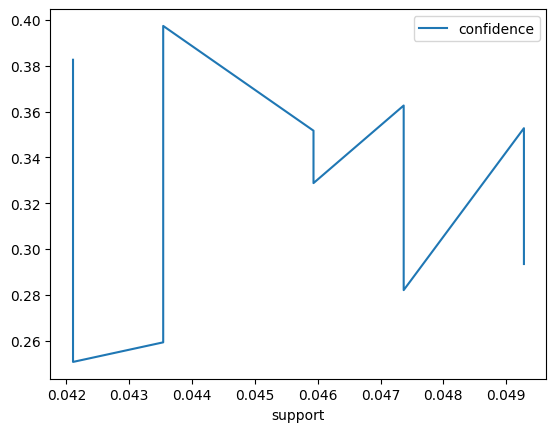

In [29]:
confidence_rules = fp.association_rules(find_combinations(chosen_data, fp.apriori, 1, False, 0.04), metric = "confidence", min_threshold = 0.2)
confidence_rules.plot.line(x='support', y='confidence')

In [30]:
confidence_rules = fp.association_rules(find_combinations(chosen_data, fp.apriori, 1, False, 0.01), metric = "confidence", min_threshold = 0.2)
confidence_rules['length'] = confidence_rules['antecedents'].apply(lambda x: len(x))

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<Axes: title={'center': 'confidence'}, xlabel='length'>

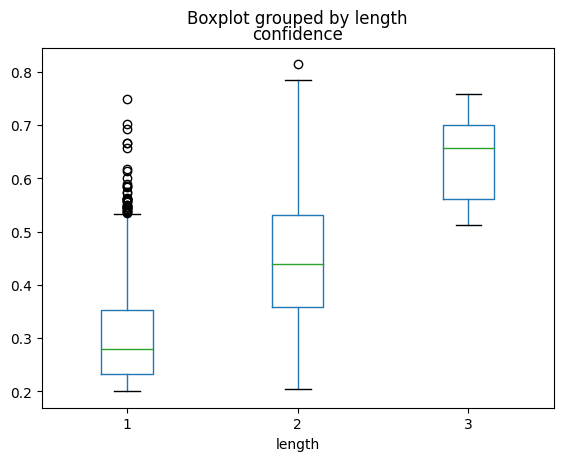

In [31]:
confidence_rules.boxplot(column='confidence', by='length', grid=False)